# Final Project Report

* Class: DS 5100
* Student Name: Quinn Glovier
* Student Net ID: qdg9xwb
* This URL: 

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL:https://github.com/quinngl/quinngl_ds5100_montecarlo

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

import numpy as np
import pandas as pd
class Dice():
    '''
    This class creates a dice object with an editable number of faces. Methods include the ability to change the weight of a face, rolling the dice, and returning a dataframe with the faces and weights of the dice.
    '''
    
    
    def __init__(self, faces):
        '''
        PURPOSE: Initialize the object of the dice class
        INPUT: numpy array of unique objects of the same data type which will represent the dice
        '''
        self.faces = faces
        self.weights = np.ones(len(self.faces))
        data_type = type(faces[0])
        if not isinstance(faces, np.ndarray):
            raise TypeError("Input must be a numpy array")
        if not all(isinstance(item, data_type) for item in faces):
            raise ValueError("All items in the array must have the same data type.")
        if len(faces) != len(set(faces)):
            raise ValueError("All items in the array must be unique.")
        else:
            self.dice_df = pd.DataFrame({'faces': self.faces, 'weights':self.weights})
    
    def change_weights(self, n, w):
        '''
        PURPOSE: change the weight of a single face of the die.
        INPUT: n- the face to be changed in the method; w- the new weight of the face
        OUTPUT: a data frame displaying all the weights and faces of the dice
        '''
        typen = type(n)
        if n not in self.faces:
            raise IndexError("The given value is not a face on the die.")
        if not isinstance(n, int) | isinstance(n, float) | isinstance(n, str):
            raise TypeError("The data type of the given value does not match the data type of the die.")
        else:
            mask = self.dice_df['faces'] == n
            self.dice_df.loc[mask, 'weights'] = w
            return self.dice_df
        
    def roll_dice(self, rolls = 1):
        '''
        PURPOSE: "roll" the dice object
        INPUT: the number of rolls to be operated in the method; default = 1
        OUTPUT: a list of faces returned by the rolling operation
        '''
        results = []
        for i in range(rolls):
            result = self.dice_df.faces.sample(weights=self.dice_df.weights).values[0]
            results.append(result)
        return results
    
    def print_dice(self):
        '''
        PURPOSE: display the dataframe of the dice faces and weights
        INPUT: none
        OUTPUT: the dice dataframe
        '''
        return self.dice_df

class Game():
    '''
    This class takes a list of dice objects and returns the outputs of multiple rolled dice in different formats
    '''
    
    def __init__(self, dicelist):
        '''
        PURPOSE: to initialize the game class
        INPUT: a list of dice objects
        OUTPUT: a game object
        '''
        self.dicelist = dicelist
        if not isinstance(dicelist, list):
            raise TypeError("input must be a list")
        else:
            pass
    
    def play(self, r):
        '''
        PURPOSE: roll all the dice in the game and return a dataframe of the responses
        INPUT: the number of rolls
        OUTPUT: a dataframe with the roll outputs for each dice
        '''
        outcomes = []
        for i in self.dicelist:
            outcome = i.roll_dice(rolls = r)
            outcomes.append(outcome)
            self.plays = pd.DataFrame({f'Dice {i}': sublist for i, sublist in enumerate(outcomes)})
            self.plays.index.name = "Roll"
        return self.plays
    
    def recent_play(self, form = "wide"):
        '''
        PURPOSE: create a data frame of all the recent plays of the play method
        INPUT: the table format of the data frame; default = wide
        OUTPUT: a dataframe of recent plays
        '''
        if form == "narrow":
            self.indexed = self.plays.reset_index()
            self.narrow_df = pd.melt(self.indexed, id_vars = ['Roll'], var_name = 'Dice', value_name='Play_Result').reset_index()
            self.narrow_df = self.narrow_df.pivot_table(index = ['Roll', 'Dice'],
                                                          values = 'Play_Result')
            return self.narrow_df
        if form == "wide":
            return self.plays
        else:
            raise ValueError('Form must be either narrow or wide')

class Analyzer():
    '''
    A class that calculates various statistical values from the output of the game class
    '''
    
    def __init__(self, game):
        '''
        PURPOSE: Initialize the analyzer class
        INPUT: a game object
        OUTPUT: an analyzer class instance
        '''
        self.game = game
        data_type = Game
        if not isinstance(self.game, data_type):
            raise ValueError("Attribute must be an object instance from the Game class")
        else:
            pass
        
    def jackpot(self):
        '''
        PURPOSE: identify rolls where all the dice returned the same face (a jackpot)
        INPUT: none
        OUTPUT: a value count of all rolls that have the same number (a jackpot count)
        '''
        count = 0
        for index, row in self.game.plays.iterrows():
            if all(value == row.iloc[0] for value in row):
                count += 1
        return count
    
    def face_count(self):
        '''
        PURPOSE: Count the number of times a face value appeared for each roll
        INPUT: none
        OUTPUT: a dataframe displaying the counts for each time a face appeared in the rolls
        '''
        mygame = self.game.recent_play(form = "narrow").groupby('Roll').value_counts().reset_index().rename({0:'Count'}, axis = 1)
        mygame = mygame.pivot_table(index = 'Roll',
                                   columns = 'Play_Result',
                                   values = 'Count')
        mygame = mygame.fillna(0)
        return mygame
    
    def combos(self):
        '''
        PURPOSE: identify the combinations of different faces within a game
        INPUT: none
        OUTPUT: a multi-index dataframe
        '''
        cdict = {}
        for _,roll in self.game.plays.iterrows():
            c = tuple(sorted(roll.tolist()))
            if c in cdict:
                cdict[c] += 1
            else:
                cdict[c] = 1
        mycombos = pd.DataFrame(cdict.values(),
                                index = pd.MultiIndex.from_tuples(cdict.keys()),
                                columns = ["Count"])
        return mycombos
    
    def perms(self):
        '''
        PURPOSE: identify the permutations of different faces within the game
        INPUT: none
        OUTPUT: a multi-index dataframe
        '''
        myplays = self.game.recent_play(form = "wide")
        myperms = myplays.groupby(myplays.columns.tolist()).value_counts()
        myperms = pd.DataFrame(myperms)
        return myperms

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

import numpy as np
import pandas as pd

import unittest
from montecarlo import Dice
from montecarlo import Game
from montecarlo import Analyzer

class TestDice(unittest.TestCase):
    '''
    This class provides a number of unit tests to ensure the functionality of the dice class
    '''
    
    def test_init(self):
        '''
        PURPOSE: ensure the Dice class is producing the dice object when initialized
        INPUT: none
        OUTPUT: a true assertion
        '''
        arr = np.array([1, 3, 5, 7, 9])
        dice1 = Dice(arr)
        
        self.assertTrue(isinstance(dice1, Dice))
    
    def test_change_weights(self):
        '''
        PURPOSE: ensure the change weights method of the Dice class works properly
        INPUT: none
        OUTPUT: an equal assertion
        '''
        arr = np.array([1, 3, 5, 7, 9])
        dice1 = Dice(arr)
        dice1.change_weights(1, 2)
        
        expected = 2.0
        actual = dice1.dice_df['weights'][0]
        self.assertEqual(expected, actual)
        
    def test_roll_dice(self):
        '''
        PURPOSE: ensure the roll dice method of the Dice class works properly
        INPUT: none
        OUTPUT: a true assertion
        '''
        arr = np.array([1, 3, 5, 7, 9])
        dice1 = Dice(arr)
        
        diceroll = dice1.roll_dice()
        result_type = list
        
        self.assertTrue(isinstance(diceroll, result_type))
        
    def test_print_dice(self):
        '''
        PURPOSE: ensure that the print dice method of the dice class works properly
        INPUT: none
        OUTPUT: a true assertion
        '''
        arr = np.array([1, 3, 5, 7, 9])
        dice1 = Dice(arr)
        
        diceroll = dice1.roll_dice(3)
        dice_results = dice1.print_dice()
        data_type = pd.core.frame.DataFrame
        
        self.assertTrue(isinstance(dice_results, data_type))
        
if __name__ == '__main__':
    unittest.main(verbosity = 3)
    
class TestGame(unittest.TestCase):
    '''
    This class is a series of unit tests to ensure the functionality of the Game class
    '''
    
    def test_init(self):
        '''
        PURPOSE: test the initialization of the game class
        INPUT: none
        OUTPUT: a true assertion
        '''
        dice1 = Dice(np.array([1, 3, 5, 7, 9]))
        dice2 = Dice(np.array([4, 1, 2, 7, 3]))
        dice3 = Dice(np.array([3, 5, 7, 2, 9]))
        dicelist = [dice1, dice2, dice3]
        game1 = Game(dicelist)
        
        self.assertTrue(isinstance(game1, Game))
    
    def test_play(self):
        '''
        PURPOSE: test the play method of the game class
        INPUT: none
        OUTPUT: equal assertion
        '''
        dice1 = Dice(np.array([1, 3, 5, 7, 9]))
        dice2 = Dice(np.array([4, 1, 2, 7, 3]))
        dice3 = Dice(np.array([3, 5, 7, 2, 9]))
        dicelist = [dice1, dice2, dice3]
        game1 = Game(dicelist)
        
        gameplay = game1.play(3)
        expected = 3
        self.assertEqual(len(gameplay), expected)
        
    def test_recent_play(self):
        '''
        PURPOSE: test the recent play method of the game class
        INPUT: none
        OUTPUT: two equal assertions
        '''
        dice1 = Dice(np.array([1, 3, 5, 7, 9]))
        dice2 = Dice(np.array([4, 1, 2, 7, 3]))
        dicelist = [dice1, dice2]
        game1 = Game(dicelist)
        gameplay = game1.play(3)
        game_recent1 = game1.recent_play(form = "wide")
        game_recent2 = game1.recent_play(form = "narrow")
        len1 = 3
        len2 = 6
        
        self.assertEqual(len(game_recent1), len1)
        self.assertEqual(len(game_recent2), len2)
        
if __name__ == '__main__':
    unittest.main(verbosity = 3)
    
    
class TestAnalyzer(unittest.TestCase):
    '''
    This class is a series of unit tests to ensure the functionality of the analyzer class
    '''
    
    def test_init(self):
        '''
        PURPOSE: test the initialization of the Analyzer class
        INPUT: none
        OUTPUT: a true assertion
        '''
        dice1 = Dice(np.array([1, 3, 5, 7, 9]))
        dice2 = Dice(np.array([4, 1, 2, 7, 3]))
        dice3 = Dice(np.array([3, 5, 7, 2, 9]))
        dicelist = [dice1, dice2, dice3]
        game1 = Game(dicelist)
        gameplay = game1.play(3)
        game_recent1 = game1.recent_play(form = "wide")
        ana1 = Analyzer(game1)
        
        self.assertTrue(isinstance(ana1, Analyzer))
    
    def test_jackpot(self):
        '''
        PURPOSE: test the jackpot method of the Analyzer class
        INPUT: none
        OUTPUT: a true assertion
        '''
        dice1 = Dice(np.array([1, 3, 5, 7, 9]))
        dice2 = Dice(np.array([4, 1, 2, 7, 3]))
        dice3 = Dice(np.array([3, 5, 7, 2, 9]))
        dicelist = [dice1, dice2, dice3]
        game1 = Game(dicelist)
        gameplay = game1.play(3)
        game_recent1 = game1.recent_play(form = "wide")
        ana1 = Analyzer(game1)
        test = ana1.jackpot()
        
        self.assertTrue(isinstance(test, int))
        
    def test_facecount(self):
        '''
        PURPOSE: test the face counting maethod of the Analyzer class
        INPUT: none
        OUTPUT: a true assertion
        '''
        dice1 = Dice(np.array([1, 3, 5, 7, 9]))
        dice2 = Dice(np.array([4, 1, 2, 7, 3]))
        dice3 = Dice(np.array([3, 5, 7, 2, 9]))
        dicelist = [dice1, dice2, dice3]
        game1 = Game(dicelist)
        gameplay = game1.play(3)
        game_recent1 = game1.recent_play(form = "wide")
        ana1 = Analyzer(game1)
        test = ana1.facecount()
        
        self.assertTrue(isinstance(test, pd.core.frame.DataFrame))
    
    def test_combos(self):
        '''
        PURPOSE: test the combination counting method of the Analyzer class
        INPUT: none
        OUTPUT: a true assertion
        '''
        dice1 = Dice(np.array([1, 3, 5, 7, 9]))
        dice2 = Dice(np.array([4, 1, 2, 7, 3]))
        dice3 = Dice(np.array([3, 5, 7, 2, 9]))
        dicelist = [dice1, dice2, dice3]
        game1 = Game(dicelist)
        gameplay = game1.play(3)
        game_recent1 = game1.recent_play(form = "wide")
        ana1 = Analyzer(game1)
        test = ana1.combos()
        
        self.assertTrue(isinstance(test, pd.core.frame.DataFrame))
    
    def test_perms(self):
        '''
        PURPOSE: test the permutation counting method of the analyzer class
        INPUT: none
        OUTPUT: a true assertion
        '''
        dice1 = Dice(np.array([1, 3, 5, 7, 9]))
        dice2 = Dice(np.array([4, 1, 2, 7, 3]))
        dice3 = Dice(np.array([3, 5, 7, 2, 9]))
        dicelist = [dice1, dice2, dice3]
        game1 = Game(dicelist)
        gameplay = game1.play(3)
        game_recent1 = game1.recent_play(form = "wide")
        ana1 = Analyzer(game1)
        test = ana1.perms()
        
        self.assertTrue(isinstance(test, pd.core.frame.DataFrame))
        

if __name__ == '__main__':
    unittest.main(verbosity = 3)
        
        

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
import quinngl_ds5100_montecarlo.montecarlo.montecarlo as montecarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [21]:
help(montecarlo)

Help on module quinngl_ds5100_montecarlo.montecarlo.montecarlo in quinngl_ds5100_montecarlo.montecarlo:

NAME
    quinngl_ds5100_montecarlo.montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Dice
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  A class that calculates various statistical values from the output of the game class
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      PURPOSE: Initialize the analyzer class
     |      INPUT: a game object
     |      OUTPUT: an analyzer class instance
     |  
     |  combos(self)
     |      PURPOSE: identify the combinations of different faces within a game
     |      INPUT: none
     |      OUTPUT: a multi-index dataframe
     |  
     |  face_count(self)
     |      PURPOSE: Count the number of times a face value appeared for each roll
     |      INPUT: none
     |      OUTPUT: a dataframe displaying the counts for each time a fac

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/quinngl/quinngl_ds5100_montecarlo/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [162]:
#Fair Coin
import numpy as np
coinarray = np.array(["H", "T"])
faircoin = montecarlo.Dice(coinarray)

In [163]:
#Unfair Coin
unfaircoin = montecarlo.Dice(coinarray)
unfaircoin.change_weights("H", 5.0)

,faces,weights
0,H,5.0
1,T,1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [164]:
#Creating the dice
dicefaces = np.array([1, 2])

dice1 = montecarlo.Dice(dicefaces)
dice2 = montecarlo.Dice(dicefaces)

dicelist = [dice1, dice2]
#Creating the game
game1 = montecarlo.Game(dicelist)
#Running the game
game1.play(1000)

,Dice 0,Dice 1
Roll,,
0,1,2
1,2,1
2,1,1
3,2,1
4,2,2
...,...,...
995,1,2
996,1,1
997,2,1


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [165]:
#Change dice weights to make them unfair
dice1.change_weights(1, 4)
dice2.change_weights(2, 6)

#New dice
dice3 = montecarlo.Dice(dicefaces)
dicelist = [dice1, dice2, dice3]
game2 = montecarlo.Game(dicelist)
game2.play(1000)

,Dice 0,Dice 1,Dice 2
Roll,,,
0,1,2,2
1,1,2,1
2,1,2,1
3,1,2,1
4,1,2,1
...,...,...,...
995,1,2,2
996,1,2,1
997,1,2,2


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [167]:
#Jackput function for the fair game
ana1 = montecarlo.Analyzer(game1)
ana1.jackpot()

521

In [166]:
#Jackpot function for the unfair game
ana2 = montecarlo.Analyzer(game2)
ana2.jackpot()

125

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [168]:
#Calculating frequencies
game1_freq = 521/1000
game2_freq = 125/1000
print(game1_freq)
print(game2_freq)

0.521
0.125


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

<BarContainer object of 2 artists>

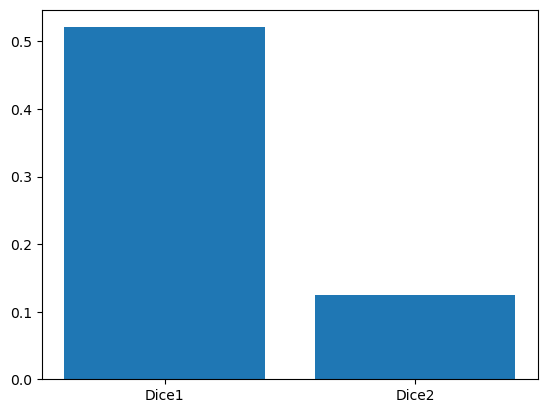

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
#Creating a dataframe of the frequencies
freq = pd.DataFrame([game1_freq, game2_freq]).rename({0:'Frequency'}, axis = 1)
freq['Dice'] = ["Dice1", "Dice2"]
#Plotting the data frame
plt.bar(freq.Dice, freq.Frequency)

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [170]:
dicefaces = np.array([1, 2, 3, 4, 5, 6])
dice1 = montecarlo.Dice(dicefaces)
dice2 = montecarlo.Dice(dicefaces)
dice3 = montecarlo.Dice(dicefaces)

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [171]:
#weight change 1
dice1.change_weights(6, 5)

,faces,weights
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [172]:
#Weight change 2
dice2.change_weights(1, 5)

,faces,weights
0,1,5.0
1,2,1.0
2,3,1.0
3,4,1.0
4,5,1.0
5,6,1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [182]:
#Creating the dice list
fair1 = montecarlo.Dice(dicefaces)
fair2 = montecarlo.Dice(dicefaces)
fair3 = montecarlo.Dice(dicefaces)
fair4 = montecarlo.Dice(dicefaces)
fair5 = montecarlo.Dice(dicefaces)
fairlist = [fair1, fair2, fair3, fair4, fair5]

#Creating the game
game1 = montecarlo.Game(fairlist)
game1.play(1000)

,Dice 0,Dice 1,Dice 2,Dice 3,Dice 4
Roll,,,,,
0,3,4,5,5,6
1,5,2,6,4,5
2,3,4,5,3,4
3,5,1,4,6,6
4,3,2,2,5,2
...,...,...,...,...,...
995,4,3,5,3,4
996,6,1,4,6,4
997,5,6,5,1,5


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [183]:
#Unfair dice list
dicelist = [fair1, fair2, fair3, dice1, dice2]
#Game 2
game2 = montecarlo.Game(dicelist)
game2.play(1000)

,Dice 0,Dice 1,Dice 2,Dice 3,Dice 4
Roll,,,,,
0,2,2,5,3,2
1,1,3,5,6,1
2,1,6,3,6,4
3,3,3,3,1,1
4,4,4,1,1,1
...,...,...,...,...,...
995,4,3,6,6,1
996,6,5,1,3,4
997,6,5,6,5,1


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

<BarContainer object of 2 artists>

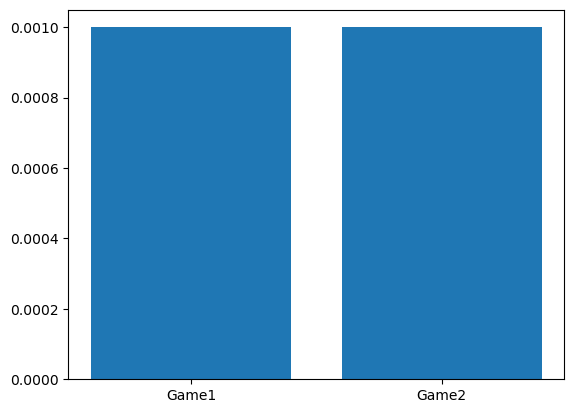

In [185]:
#analyzer classes
ana1 = montecarlo.Analyzer(game1)
ana2 = montecarlo.Analyzer(game2)

#jackpots and frequencies
jackpot1 = ana1.jackpot()
jackpot2 = ana2.jackpot()
freq1 = jackpot1 / 1000
freq2 = jackpot2 / 1000

#plotting
freq = pd.DataFrame([freq1, freq2]).rename({0:'Frequency'}, axis = 1)
freq['Games'] = ["Game1", "Game2"]

plt.bar(freq.Games, freq.Frequency)

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [186]:
#Formatting the file for iteration in a dictionary format
letterdict = {}
with open('english_letters.txt', 'r') as el:
    for i in el:
        letter, count = i.split() 
        letterdict[letter] = int(count)

letters = np.array(list(letterdict.keys()))
#Iteration
letterdice = montecarlo.Dice(letters)
for letter, count in letterdict.items():
    letterdice.change_weights(letter, count)

In [187]:
letterdice.dice_df

,faces,weights
0,E,529117365.0
1,T,390965105.0
2,A,374061888.0
3,O,326627740.0
4,I,320410057.0
5,N,313720540.0
6,S,294300210.0
7,R,277000841.0
8,H,216768975.0
9,L,183996130.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [188]:
#Initializing the game with 4 dice
letterdicelist = [letterdice] * 4
lettergame = montecarlo.Game(letterdicelist)
lettergame.play(1000)

,Dice 0,Dice 1,Dice 2,Dice 3
Roll,,,,
0,B,A,B,I
1,T,E,S,O
2,M,E,I,H
3,W,G,E,W
4,N,P,A,O
...,...,...,...,...
995,I,O,B,R
996,X,E,I,E
997,Z,N,I,N


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [189]:
#Loading the scrabble text as a list
scrabble = pd.read_csv('/Users/quinnglovier/Desktop/scrabble_words.txt', header = None)
scrabble = list(scrabble[0])
#Creating the Analyzer class
lanalyze = montecarlo.Analyzer(lettergame)
#Permutation
p = lanalyze.perms().reset_index()
p = p[['Dice 0', 'Dice 1', 'Dice 2', 'Dice 3']]
#Turning the private rows into a list
p_list = p.apply(lambda row: ''.join(row), axis=1).tolist()
#Filter the permutation list with the scrabble list
scrabble_words = [i for i in p_list if i in scrabble]
print("The number of permutations that match the scrabble words are:", len(scrabble_words))

The number of permutations that match the scrabble words are: 53


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [190]:
#Creating the game with 5 dice
letterdicelist = [letterdice] * 5
lettergame = montecarlo.Game(letterdicelist)
lettergame.play(1000)

#Loading the scrabble text as a list
scrabble = pd.read_csv('/Users/quinnglovier/Desktop/scrabble_words.txt', header = None)
scrabble = list(scrabble[0])
#Creating the Analyzer class
lanalyze = montecarlo.Analyzer(lettergame)
#Permutation
p = lanalyze.perms().reset_index()
p = p[['Dice 0', 'Dice 1', 'Dice 2', 'Dice 3', 'Dice 4']]
#Turning the private rows into a list
p_list = p.apply(lambda row: ''.join(row), axis=1).tolist()
#Filter the permutation list with the scrabble list
scrabble_words = [i for i in p_list if i in scrabble]
print("The number of permutations that match the scrabble words are:", len(scrabble_words))

The number of permutations that match the scrabble words are: 9


The game with 4 dice produced more words than the game with 5 dice

# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.